# "Big Data Generator": Fed batch model

In [1]:
from parameters import Parameters
from model import initial_values, fedbatch, feed_values
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

## Original initial values

In [2]:
def plot(sol, par):
    plt.figure(1)
    plt.plot(sol.t, sol.y[0,:], label='Glucose')
    plt.plot(sol.t, sol.y[1,:], label='Xylose')
    plt.plot(sol.t, sol.y[2,:], label='Furfural')
    plt.plot(sol.t, sol.y[3,:], label='Furfuryl alcohol')
    plt.plot(sol.t, sol.y[4,:], label='5-HMF')
    plt.plot(sol.t, sol.y[5,:], label='HAc')
    plt.plot(sol.t, sol.y[6,:], label='Ethanol')
    plt.plot(sol.t, sol.y[7,:], label='Biomass')
    plt.xlim(0,50)
    plt.ylim(0,40)
    plt.xlabel('Time [s]')
    plt.ylabel('Concentration [g/L]')
    plt.legend()
    plt.savefig('growth.png')

    plt.figure(2)
    plt.plot(sol.t, sol.y[8,:], label='Tank volume')
    plt.xlim(0,50)
    # plt.ylim(0,40)
    plt.xlabel('Time [s]')
    plt.ylabel('Volume [L]')
    plt.legend()

[39.7, 23.5, 0.56, 0, 0.2, 3.05, 0.62, 1.75, 0.7]
[39.7, 23.5, 0.56, 0, 0.2, 3.05, 0.62, 0, 0.7]


c:\Users\jlne\OneDrive - Danmarks Tekniske Universitet\PhD_main\Courses\Automation_and_Control_of_Yeast_Fermentation\DAY3\model.py:180: RuntimeWarning: invalid value encountered in double_scalars
  Ph19a = 1-(x[6]/par.PMPg)**par.gammaG
c:\Users\jlne\OneDrive - Danmarks Tekniske Universitet\PhD_main\Courses\Automation_and_Control_of_Yeast_Fermentation\DAY3\model.py:181: RuntimeWarning: invalid value encountered in double_scalars
  Ph19b = 1-(x[6]/par.PMPx)**par.gammaX


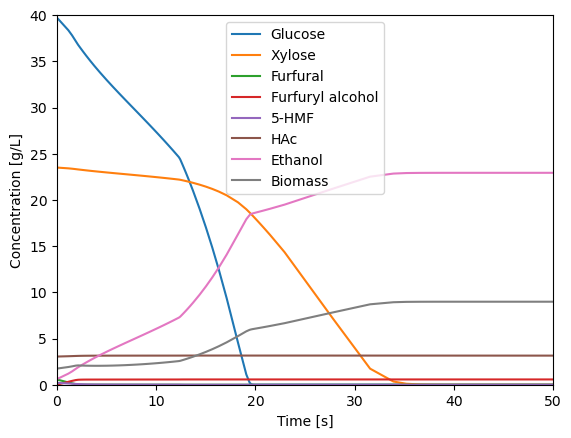

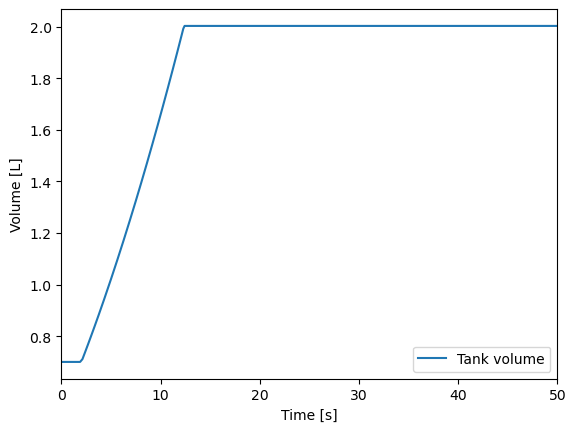

In [3]:
par = Parameters()                                                  # Define parameters 
init = initial_values()                                             # Define initial values
Cfeed = feed_values(init)                                           # Define feed compotision (same as initial values, but biomass is zero)
print(init)
print(Cfeed)
tspan=(0,50)                                                        # Time span  of the simulation
sol = solve_ivp(fedbatch, t_span=tspan, y0=init, args=(par,Cfeed,)) # Solve the fedbatch mode
plot(sol, par)                                                      # Plot the results



## Random variations in the feedstock composition

Variability in initial conditions

In [4]:
import random
def variable_feedstock(i):
    '''Define min and max values, then generates a random value between min and max'''
    random.seed(i)

    Glu0min = 35;    Glu0max = 40           # g/L
    Glu0 = random.uniform(Glu0min, Glu0max)

    Xyl0min = 18;    Xyl0max = 28           # g/L
    Xyl0 = random.uniform(Xyl0min, Xyl0max)

    Fur0min = 0.6;   Fur0max = 2            # g/L
    Fur0 = random.uniform(Fur0min, Fur0max)

    FA0min = 0;      FA0max = 0             # g/L
    FA0 = random.uniform(FA0min, FA0max)

    HMF0min = 0.5;   HMF0max = 2            # g/L
    HMF0 = random.uniform(HMF0min, HMF0max)

    HAc0min = 2;     HAc0max = 3            # g/L
    HAc0 = random.uniform(HAc0min, HAc0max)

    EtOH0min = 0.2;  EtOH0max = 0.9         # g/L
    EtOH0 = random.uniform(EtOH0min, EtOH0max)

    V0 = 0.7
    X0 = 5              # g/L
    AB0 = 0             # g/L
    Xf = 0              # g/L
    ABf = 0             # g/L
    LAB0max = 2.5       # g/L
    LABcrit = 95        # %

    init = [Glu0, Xyl0, Fur0, FA0, HMF0, HAc0, EtOH0, X0, V0]
    return init

Variability in growth parameters

In [5]:
def variable_growth_parameters(i):
    '''min and max variability are defined and random values for the kinetic parameters are generated within the range'''
    random.seed(i)
    VarMin = 0.02          # 2%
    VarMax = 0.05          # 5%
    VarnuGlu = random.uniform(VarMin, VarMax)
    VarnuXyl = random.uniform(VarMin, VarMax)
    VarYeglu = random.uniform(VarMin, VarMax)
    VarYexyl = random.uniform(VarMin, VarMax)
    VarYXglu = random.uniform(VarMin, VarMax)
    VarYXxyl = random.uniform(VarMin, VarMax)

    ## Update the "par" object with the new kinetic parameters
    par.numaxG = 1.7271*(1+VarnuGlu)
    par.numaxX = 1.6222*(1+VarnuXyl)
    par.YPSg = 0.42*(1+VarYeglu)   
    par.YPSx = 0.24*(1+VarYexyl)
    par.YXSg = 0.115*(1+VarYXglu)     
    par.YXSx = 0.162*(1+VarYXxyl)  

In [6]:
def subplot(sol, par, fig, axs):
    '''plot the results in a subplot with one subplot for each component'''
    fig.suptitle(f'Fedbatch with random feedstock composition')
    axs[0,0].plot(sol.t, sol.y[0,:])
    axs[0,0].set(ylabel='Glucose [g/L]')
    axs[0,1].plot(sol.t, sol.y[1,:])
    axs[0,1].set(ylabel='Xylose [g/L]')
    axs[1,0].plot(sol.t, sol.y[2,:])
    axs[1,0].set(ylabel='Furfural [g/L]')
    axs[1,1].plot(sol.t, sol.y[3,:])
    axs[1,1].set(ylabel='Furfuryl alcohol [g/L]')
    axs[2,0].plot(sol.t, sol.y[4,:])
    axs[2,0].set(ylabel='5-HMF [g/L]')
    axs[2,1].plot(sol.t, sol.y[5,:])
    axs[2,1].set(ylabel='HAc [g/L]')
    axs[3,0].plot(sol.t, sol.y[6,:])
    axs[3,0].set(ylabel='Ethanol [g/L]', xlabel='Time [h]')
    axs[3,1].plot(sol.t, sol.y[7,:])
    axs[3,1].set(ylabel='Biomass [g/L]', xlabel='Time [h]')
    fig.tight_layout()
    plt.savefig('random.png')

c:\Users\jlne\OneDrive - Danmarks Tekniske Universitet\PhD_main\Courses\Automation_and_Control_of_Yeast_Fermentation\DAY3\model.py:180: RuntimeWarning: invalid value encountered in double_scalars
  Ph19a = 1-(x[6]/par.PMPg)**par.gammaG
c:\Users\jlne\OneDrive - Danmarks Tekniske Universitet\PhD_main\Courses\Automation_and_Control_of_Yeast_Fermentation\DAY3\model.py:181: RuntimeWarning: invalid value encountered in double_scalars
  Ph19b = 1-(x[6]/par.PMPx)**par.gammaX
c:\Users\jlne\OneDrive - Danmarks Tekniske Universitet\PhD_main\Courses\Automation_and_Control_of_Yeast_Fermentation\DAY3\model.py:180: RuntimeWarning: invalid value encountered in double_scalars
  Ph19a = 1-(x[6]/par.PMPg)**par.gammaG
c:\Users\jlne\OneDrive - Danmarks Tekniske Universitet\PhD_main\Courses\Automation_and_Control_of_Yeast_Fermentation\DAY3\model.py:181: RuntimeWarning: invalid value encountered in double_scalars
  Ph19b = 1-(x[6]/par.PMPx)**par.gammaX
c:\Users\jlne\OneDrive - Danmarks Tekniske Universitet\P

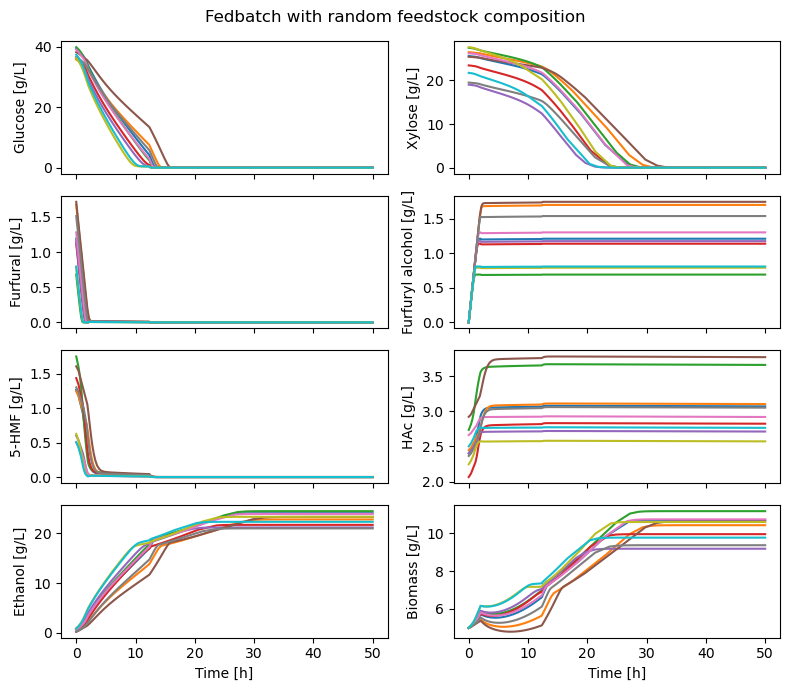

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(8,7))
## run 10 simulations and gather all results in the plot
for i in range(10):
    variable_growth_parameters(i)
    tspan=(0,50)
    init = variable_feedstock(i)
    Cfeed = feed_values(init)
    sol = solve_ivp(fedbatch, t_span=tspan, y0=init, args=(par,Cfeed))
    subplot(sol, par, fig, axs)